In [ ]:
# Data3 contains an updated version of Data2 including movies after 2005 to 2023.
# Row number indicates how many movies the data contains (+1 row 0)-> 9826
# Dataset url = https://www.kaggle.com/datasets/akashguna/netflix-prize-shows-information/data?select=imdb.csv

In [ ]:
# Main libraries : Pandas, Numpy, bs4
# Libraries for data visualisation : Matplotlib, Seaborn, Plotly

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go

In [3]:
df3 = "C:/Users/ALEV PC/Desktop/Project/Data/raw/imdb.csv"
df3 = pd.read_csv(df3)
df3.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",8.3,46.0,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",125.0
2,2,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,54.0
3,3,The Rise and Fall of El Chapo,2016.0,tv movie,['Documentary'],6.9,42.0,['United States'],NaN,NaN,NaN,NaN,NaN,85.0
4,4,Sick - IMDb,NaN,NaN,['Thriller'],NaN,NaN,['United States'],NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams'],NaN,"['Katelyn Crabb', 'Kevin Williamson']",NaN


In [4]:
df3.info

<bound method DataFrame.info of       Unnamed: 0                          title    year            kind  \
0              0                Dinosaur Planet  2003.0  tv mini series   
1              1                      Character  2021.0           movie   
2              2              Get Up and Dance!  1994.0     video movie   
3              3  The Rise and Fall of El Chapo  2016.0        tv movie   
4              4                    Sick - IMDb     NaN             NaN   
...          ...                            ...     ...             ...   
9821        9821            All Monsters Attack  1969.0           movie   
9822        9822                   Fidel Castro  2005.0         episode   
9823        9823                          Epoch  2001.0        tv movie   
9824        9824                    The Company  2003.0           movie   
9825        9825                       Predator  1987.0           movie   

                                              genre  rating      vo

In [5]:
# List of columns
df3.columns

Index(['Unnamed: 0', 'title', 'year', 'kind', 'genre', 'rating', 'vote',
       'country', 'language', 'cast', 'director', 'composer', 'writer',
       'runtime'],
      dtype='object')

In [6]:
df3.kind.unique

<bound method Series.unique of 0       tv mini series
1                movie
2          video movie
3             tv movie
4                  NaN
             ...      
9821             movie
9822           episode
9823          tv movie
9824             movie
9825             movie
Name: kind, Length: 9826, dtype: object>

In [7]:
null_values = df3.isnull().sum()
if null_values.any():
    print("Null values found:")
    print(null_values)
else:
    print("No null values found.")

Null values found:
Unnamed: 0       0
title            1
year            70
kind            38
genre           93
rating         877
vote           877
country        665
language       793
cast           344
director      1860
composer      3622
writer        1656
runtime       1056
dtype: int64


In [8]:
duplicated_rows = df3.duplicated().sum()
if duplicated_rows:
    print(f"{duplicated_rows} duplicated rows found.")
else:
    print("No duplicated rows found.")

No duplicated rows found.


In [9]:
import pandas as pd
df3 = "C:/Users/ALEV PC/Desktop/Project/Data/raw/imdb.csv"
df3 = pd.read_csv(df3)

columns_to_delete = ['cast', 'director', 'composer', 'writer', 'runtime', 'Unnamed: 0']
df3 = df3.drop(columns=columns_to_delete)
display(df3)


,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English']
1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",8.3,46.0,['Japan'],['Japanese']
2,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English']
3,The Rise and Fall of El Chapo,2016.0,tv movie,['Documentary'],6.9,42.0,['United States'],NaN
4,Sick - IMDb,NaN,NaN,['Thriller'],NaN,NaN,['United States'],NaN
...,...,...,...,...,...,...,...,...
9821,All Monsters Attack,1969.0,movie,"['Adventure', 'Family', 'Fantasy']",3.9,4384.0,['Japan'],['Japanese']
9822,Fidel Castro,2005.0,episode,"['Documentary', 'Biography', 'History']",6.4,44.0,NaN,"['English', 'Spanish']"
9823,Epoch,2001.0,tv movie,"['Sci-Fi', 'Thriller']",4.9,2376.0,['United States'],['English']
9824,The Company,2003.0,movie,"['Drama', 'Music', 'Romance']",6.3,6501.0,"['United States', 'Germany', 'United Kingdom']",['English']


In [10]:
df3 = df3.dropna()
display(df3)

,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English']
1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",8.3,46.0,['Japan'],['Japanese']
2,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English']
5,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese']
6,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']"
...,...,...,...,...,...,...,...,...
9820,Shakespeare in Love,1998.0,movie,"['Comedy', 'Drama', 'History', 'Romance']",7.1,218921.0,"['United States', 'United Kingdom']",['English']
9821,All Monsters Attack,1969.0,movie,"['Adventure', 'Family', 'Fantasy']",3.9,4384.0,['Japan'],['Japanese']
9823,Epoch,2001.0,tv movie,"['Sci-Fi', 'Thriller']",4.9,2376.0,['United States'],['English']
9824,The Company,2003.0,movie,"['Drama', 'Music', 'Romance']",6.3,6501.0,"['United States', 'Germany', 'United Kingdom']",['English']


In [11]:
tv_movie = df3[df3["kind"] == "movie"]
tv_movie

,title,year,kind,genre,rating,vote,country,language
1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",8.3,46.0,['Japan'],['Japanese']
5,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese']
6,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']"
7,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English']
8,The Fighter,2010.0,movie,"['Biography', 'Drama', 'Sport']",7.8,351199.0,['United States'],['English']
...,...,...,...,...,...,...,...,...
9819,Interiors,1978.0,movie,['Drama'],7.4,19143.0,['United States'],['English']
9820,Shakespeare in Love,1998.0,movie,"['Comedy', 'Drama', 'History', 'Romance']",7.1,218921.0,"['United States', 'United Kingdom']",['English']
9821,All Monsters Attack,1969.0,movie,"['Adventure', 'Family', 'Fantasy']",3.9,4384.0,['Japan'],['Japanese']
9824,The Company,2003.0,movie,"['Drama', 'Music', 'Romance']",6.3,6501.0,"['United States', 'Germany', 'United Kingdom']",['English']


In [12]:
# Remove ".0" from the values in the "year" and "vote" columns
df3['year'] = df3['year'].astype(str).str.rstrip('.0')
df3['vote'] = df3['vote'].astype(str).str.rstrip('.0')
display(df3)

# Now df3 will contain all rows with ".0" removed from the "year" and "vote" columns


,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474,['United States'],['English']
1,Character,2021,movie,"['Crime', 'Horror', 'Thriller']",8.3,46,['Japan'],['Japanese']
2,Get Up and Dance!,1994,video movie,['Family'],8.1,18,['United States'],['English']
5,8 Man,1992,movie,"['Action', 'Sci-Fi']",5.5,93,['Japan'],['Japanese']
6,What the #$*! Do We (K)now!?,2004,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432,['United States'],"['English', 'German', 'Spanish']"
...,...,...,...,...,...,...,...,...
9820,Shakespeare in Love,1998,movie,"['Comedy', 'Drama', 'History', 'Romance']",7.1,218921,"['United States', 'United Kingdom']",['English']
9821,All Monsters Attack,1969,movie,"['Adventure', 'Family', 'Fantasy']",3.9,4384,['Japan'],['Japanese']
9823,Epoch,2001,tv movie,"['Sci-Fi', 'Thriller']",4.9,2376,['United States'],['English']
9824,The Company,2003,movie,"['Drama', 'Music', 'Romance']",6.3,6501,"['United States', 'Germany', 'United Kingdom']",['English']


In [13]:
# Remove '[', ']', and ' ' from the values in country, language and genre columns
df3['country'] = df3['country'].str.replace('[\[\]\']', '', regex=True).str.strip()
df3['language'] = df3['language'].str.replace('[\[\]\']', '', regex=True).str.strip()
df3['genre'] = df3['genre'].str.replace('[\[\]\']', '', regex=True).str.strip()

display (df3)

,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003,tv mini series,"Documentary, Animation, Family",7.7,474,United States,English
1,Character,2021,movie,"Crime, Horror, Thriller",8.3,46,Japan,Japanese
2,Get Up and Dance!,1994,video movie,Family,8.1,18,United States,English
5,8 Man,1992,movie,"Action, Sci-Fi",5.5,93,Japan,Japanese
6,What the #$*! Do We (K)now!?,2004,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432,United States,"English, German, Spanish"
...,...,...,...,...,...,...,...,...
9820,Shakespeare in Love,1998,movie,"Comedy, Drama, History, Romance",7.1,218921,"United States, United Kingdom",English
9821,All Monsters Attack,1969,movie,"Adventure, Family, Fantasy",3.9,4384,Japan,Japanese
9823,Epoch,2001,tv movie,"Sci-Fi, Thriller",4.9,2376,United States,English
9824,The Company,2003,movie,"Drama, Music, Romance",6.3,6501,"United States, Germany, United Kingdom",English


In [14]:
df3['country'] = df3['country'].str.replace('UnitedStates', 'United States')
df3['country'] = df3['country'].str.replace('UnitedKingdom', 'United Kingdom')
display(df3)

,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003,tv mini series,"Documentary, Animation, Family",7.7,474,United States,English
1,Character,2021,movie,"Crime, Horror, Thriller",8.3,46,Japan,Japanese
2,Get Up and Dance!,1994,video movie,Family,8.1,18,United States,English
5,8 Man,1992,movie,"Action, Sci-Fi",5.5,93,Japan,Japanese
6,What the #$*! Do We (K)now!?,2004,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432,United States,"English, German, Spanish"
...,...,...,...,...,...,...,...,...
9820,Shakespeare in Love,1998,movie,"Comedy, Drama, History, Romance",7.1,218921,"United States, United Kingdom",English
9821,All Monsters Attack,1969,movie,"Adventure, Family, Fantasy",3.9,4384,Japan,Japanese
9823,Epoch,2001,tv movie,"Sci-Fi, Thriller",4.9,2376,United States,English
9824,The Company,2003,movie,"Drama, Music, Romance",6.3,6501,"United States, Germany, United Kingdom",English


In [15]:
df3 = df3.dropna(how='any')
display(df3)

,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003,tv mini series,"Documentary, Animation, Family",7.7,474,United States,English
1,Character,2021,movie,"Crime, Horror, Thriller",8.3,46,Japan,Japanese
2,Get Up and Dance!,1994,video movie,Family,8.1,18,United States,English
5,8 Man,1992,movie,"Action, Sci-Fi",5.5,93,Japan,Japanese
6,What the #$*! Do We (K)now!?,2004,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432,United States,"English, German, Spanish"
...,...,...,...,...,...,...,...,...
9820,Shakespeare in Love,1998,movie,"Comedy, Drama, History, Romance",7.1,218921,"United States, United Kingdom",English
9821,All Monsters Attack,1969,movie,"Adventure, Family, Fantasy",3.9,4384,Japan,Japanese
9823,Epoch,2001,tv movie,"Sci-Fi, Thriller",4.9,2376,United States,English
9824,The Company,2003,movie,"Drama, Music, Romance",6.3,6501,"United States, Germany, United Kingdom",English


In [16]:
# Separating table with movies before 1950 
import pandas as pd

# Assuming df3 is your DataFrame
# Convert 'year' column to integer if it's not already
df3['year'] = df3['year'].astype(int)

# Create a table including years 1950 and after
df_after_1950 = df3[df3['year'].astype(int) >= 1950]

# Display the table
print("Table including years 1950 and after:")
display(df_after_1950)


Table including years 1950 and after:


,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003,tv mini series,"Documentary, Animation, Family",7.7,474,United States,English
1,Character,2021,movie,"Crime, Horror, Thriller",8.3,46,Japan,Japanese
2,Get Up and Dance!,1994,video movie,Family,8.1,18,United States,English
5,8 Man,1992,movie,"Action, Sci-Fi",5.5,93,Japan,Japanese
6,What the #$*! Do We (K)now!?,2004,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432,United States,"English, German, Spanish"
...,...,...,...,...,...,...,...,...
9820,Shakespeare in Love,1998,movie,"Comedy, Drama, History, Romance",7.1,218921,"United States, United Kingdom",English
9821,All Monsters Attack,1969,movie,"Adventure, Family, Fantasy",3.9,4384,Japan,Japanese
9823,Epoch,2001,tv movie,"Sci-Fi, Thriller",4.9,2376,United States,English
9824,The Company,2003,movie,"Drama, Music, Romance",6.3,6501,"United States, Germany, United Kingdom",English


In [17]:
import pandas as pd

# Assuming df3 is your DataFrame
# Convert 'year' column to integer if it's not already
df3['year'] = df3['year'].astype('int64')

# Create a table including years 1950 and after
df_after_1950 = df3[df3['year'] >= 1950]

# Display the table
print("Table including years 1950 and after:")
display(df_after_1950)

# Display the count of records for each decade
print("\nNumber of records for each decade:")
for decade in range(1950, 2024, 10):
    start_year = decade
    end_year = decade + 9
    df_decade = df_after_1950[(df_after_1950['year'] >= start_year) & (df_after_1950['year'] <= end_year)]
    print(f"{start_year}s: {len(df_decade)} records")



Table including years 1950 and after:


,title,year,kind,genre,rating,vote,country,language
0,Dinosaur Planet,2003,tv mini series,"Documentary, Animation, Family",7.7,474,United States,English
1,Character,2021,movie,"Crime, Horror, Thriller",8.3,46,Japan,Japanese
2,Get Up and Dance!,1994,video movie,Family,8.1,18,United States,English
5,8 Man,1992,movie,"Action, Sci-Fi",5.5,93,Japan,Japanese
6,What the #$*! Do We (K)now!?,2004,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432,United States,"English, German, Spanish"
...,...,...,...,...,...,...,...,...
9820,Shakespeare in Love,1998,movie,"Comedy, Drama, History, Romance",7.1,218921,"United States, United Kingdom",English
9821,All Monsters Attack,1969,movie,"Adventure, Family, Fantasy",3.9,4384,Japan,Japanese
9823,Epoch,2001,tv movie,"Sci-Fi, Thriller",4.9,2376,United States,English
9824,The Company,2003,movie,"Drama, Music, Romance",6.3,6501,"United States, Germany, United Kingdom",English



Number of records for each decade:
1950s: 183 records
1960s: 324 records
1970s: 562 records
1980s: 844 records
1990s: 2262 records
2000s: 2794 records
2010s: 399 records
2020s: 60 records


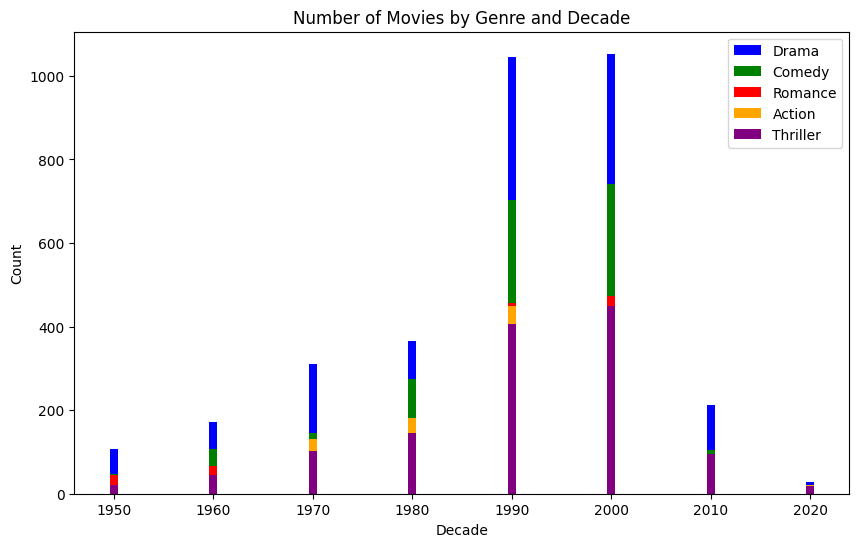

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
# Convert 'year' column to integer if it's not already
df3['year'] = df3['year'].astype('int64')

# Define the list of top genres
top_genres = ['Drama', 'Comedy', 'Romance', 'Action', 'Thriller']

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Define color map
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Iterate over each genre
for i, genre in enumerate(top_genres):
    # Initialize a list to store genre counts for each decade
    genre_counts = []
    
    # Iterate over decades
    for decade in range(1950, 2024, 10):
        start_year = decade
        end_year = decade + 9
        
        # Filter DataFrame for the current decade and genre
        df_genre_decade = df3[(df3['year'] >= start_year) & (df3['year'] <= end_year) & (df3['genre'].str.contains(genre))]
        
        # Count number of movies for the current genre in the current decade
        genre_counts.append(len(df_genre_decade))
    
    # Plot bar plot for the current genre
    ax.bar(range(1950, 2024, 10), genre_counts, color=colors[i], label=genre)

# Set labels and title
ax.set_xlabel('Decade')
ax.set_ylabel('Count')
ax.set_title('Number of Movies by Genre and Decade')
ax.legend()

# Show the plot
plt.show()


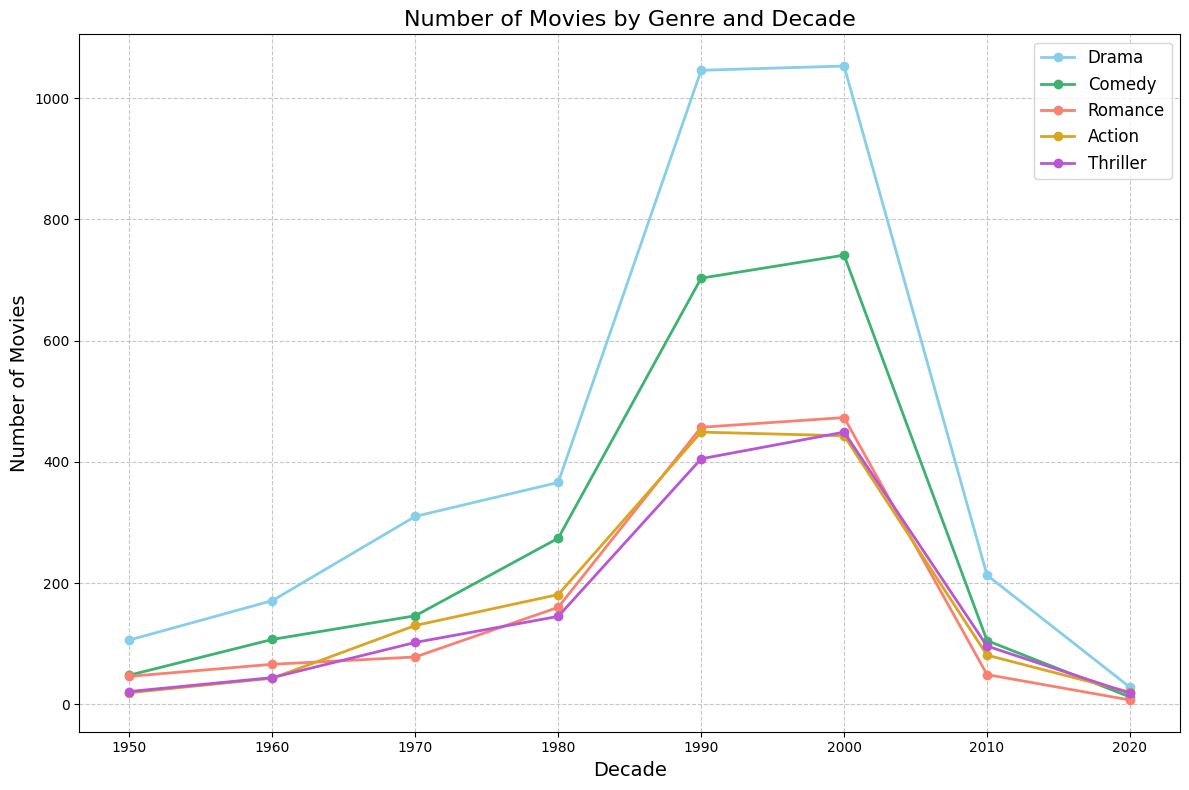

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
# Convert 'year' column to integer if it's not already
df3['year'] = df3['year'].astype('int64')

# Define the list of top genres
top_genres = ['Drama', 'Comedy', 'Romance', 'Action', 'Thriller']

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 8))

# Define color map
colors = ['skyblue', 'mediumseagreen', 'salmon', 'goldenrod', 'mediumorchid']

# Iterate over each genre
for i, genre in enumerate(top_genres):
    # Initialize a list to store genre counts for each decade
    genre_counts = []
    
    # Iterate over decades
    for decade in range(1950, 2024, 10):
        start_year = decade
        end_year = decade + 9
        
        # Filter DataFrame for the current decade and genre
        df_genre_decade = df3[(df3['year'] >= start_year) & (df3['year'] <= end_year) & (df3['genre'].str.contains(genre))]
        
        # Count number of movies for the current genre in the current decade
        genre_counts.append(len(df_genre_decade))
    
    # Plot bar plot for the current genre
    ax.plot(range(1950, 2024, 10), genre_counts, color=colors[i], marker='o', label=genre, linewidth=2)

# Set labels and title
ax.set_xlabel('Decade', fontsize=14)
ax.set_ylabel('Number of Movies', fontsize=14)
ax.set_title('Number of Movies by Genre and Decade', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


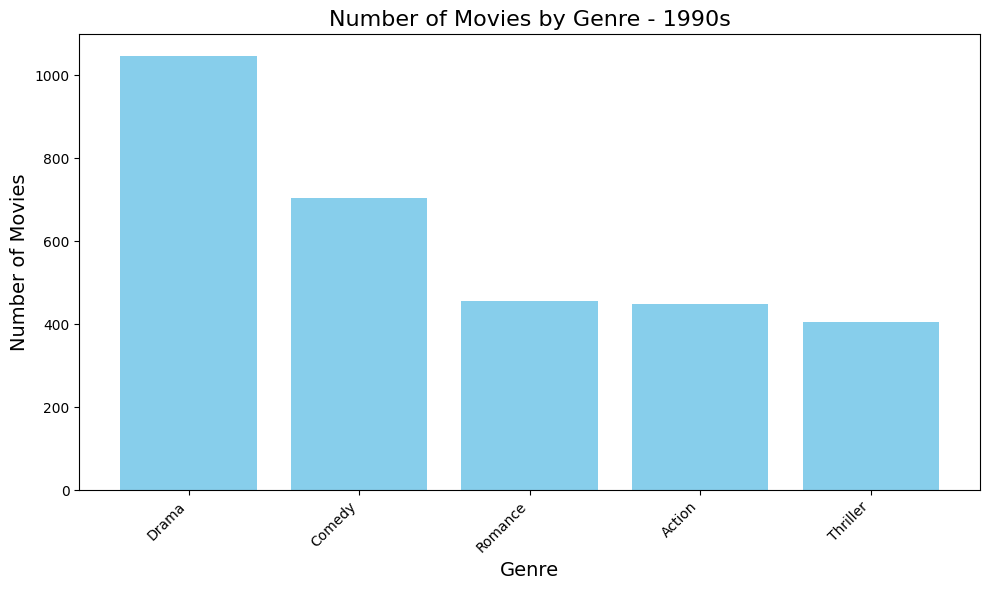

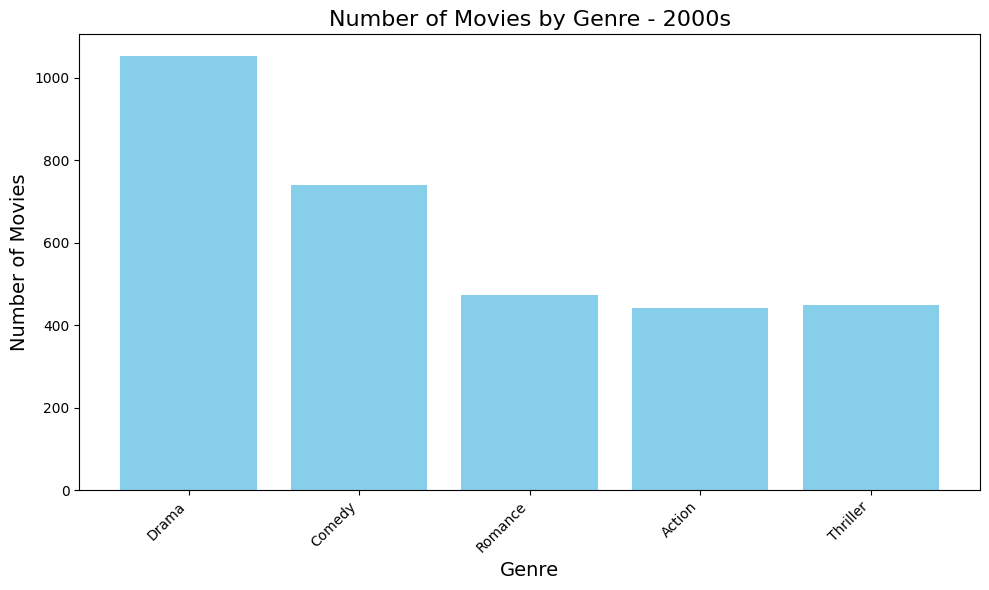

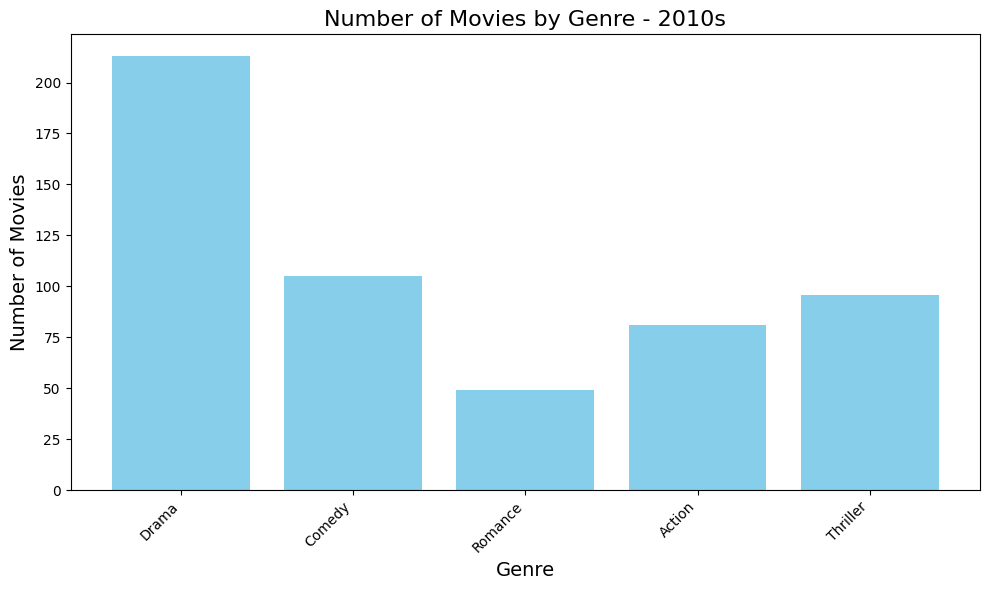

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
# Convert 'year' column to integer if it's not already
df3['year'] = df3['year'].astype('int64')

# Define the list of top genres
top_genres = ['Drama', 'Comedy', 'Romance', 'Action', 'Thriller']

# Define the decades
decades = [(1990, 1999), (2000, 2009), (2010, 2019)]

# Create separate plots for each decade
for decade in decades:
    start_year, end_year = decade
    
    # Filter DataFrame for the current decade
    df_decade = df3[(df3['year'] >= start_year) & (df3['year'] <= end_year)]
    
    # Create a new figure and axes object
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Iterate over each genre
    for i, genre in enumerate(top_genres):
        # Filter DataFrame for the current genre in the current decade
        df_genre_decade = df_decade[df_decade['genre'].str.contains(genre)]
        
        # Count number of movies for the current genre in the current decade
        genre_count = len(df_genre_decade)
        
        # Plot bar plot for the current genre
        ax.bar(genre, genre_count, color='skyblue')
    
    # Set labels and title
    ax.set_xlabel('Genre', fontsize=14)
    ax.set_ylabel('Number of Movies', fontsize=14)
    ax.set_title(f'Number of Movies by Genre - {start_year}s', fontsize=16)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()


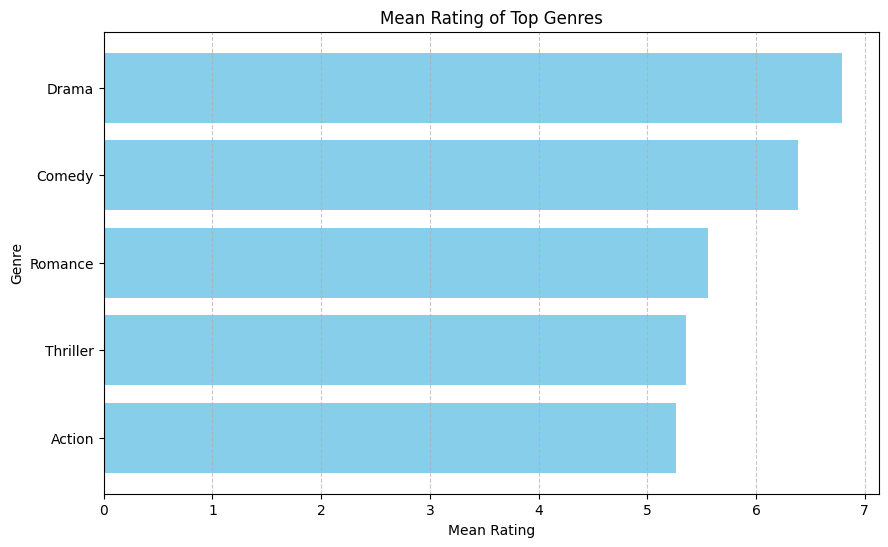

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame

# Define the list of top genres
top_genres = ['Drama', 'Comedy', 'Romance', 'Action', 'Thriller']

# Filter DataFrame for movies belonging to the top genres
df_top_genres = df3[df3['genre'].str.contains('|'.join(top_genres))]

# Calculate mean rating for each genre
mean_ratings = df_top_genres.groupby('genre')['rating'].mean()

# Sort genres based on mean rating
mean_ratings_sorted = mean_ratings[top_genres].sort_values()

# Create a bar plot to visualize the correlation
plt.figure(figsize=(10, 6))
plt.barh(mean_ratings_sorted.index, mean_ratings_sorted.values, color='skyblue')
plt.xlabel('Mean Rating')
plt.ylabel('Genre')
plt.title('Mean Rating of Top Genres')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


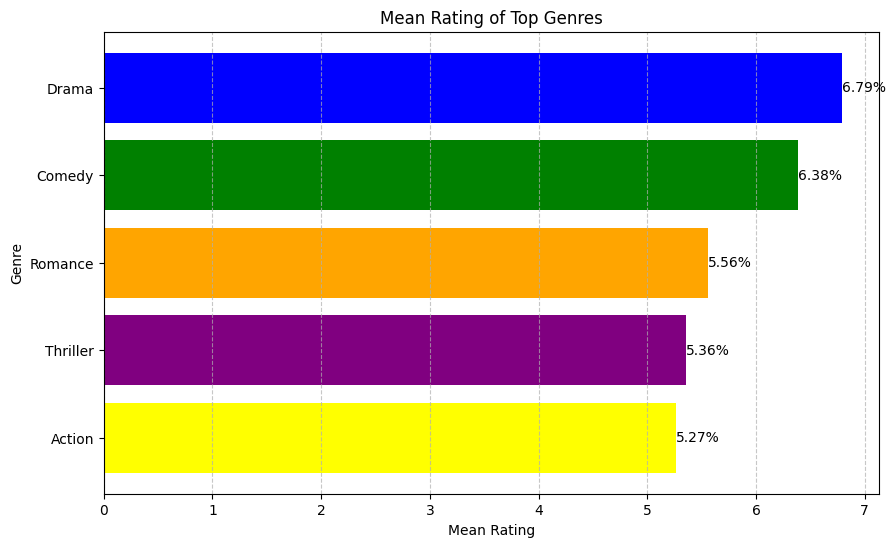

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the list of top genres and their corresponding colors
top_genres = ['Drama', 'Comedy', 'Romance', 'Action', 'Thriller']
genre_colors = {'Drama': 'blue', 'Comedy': 'green', 'Romance': 'orange', 'Action': 'yellow', 'Thriller': 'purple'}

# Filter DataFrame for movies belonging to the top genres
df_top_genres = df3[df3['genre'].str.contains('|'.join(top_genres))]

# Calculate mean rating for each genre
mean_ratings = df_top_genres.groupby('genre')['rating'].mean()

# Sort genres based on mean rating
mean_ratings_sorted = mean_ratings[top_genres].sort_values()

# Create a bar plot to visualize the correlation
plt.figure(figsize=(10, 6))
bars = plt.barh(mean_ratings_sorted.index, mean_ratings_sorted.values, color=[genre_colors[genre] for genre in mean_ratings_sorted.index])
plt.xlabel('Mean Rating')
plt.ylabel('Genre')
plt.title('Mean Rating of Top Genres')

# Add percentages to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', 
             va='center', ha='left', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


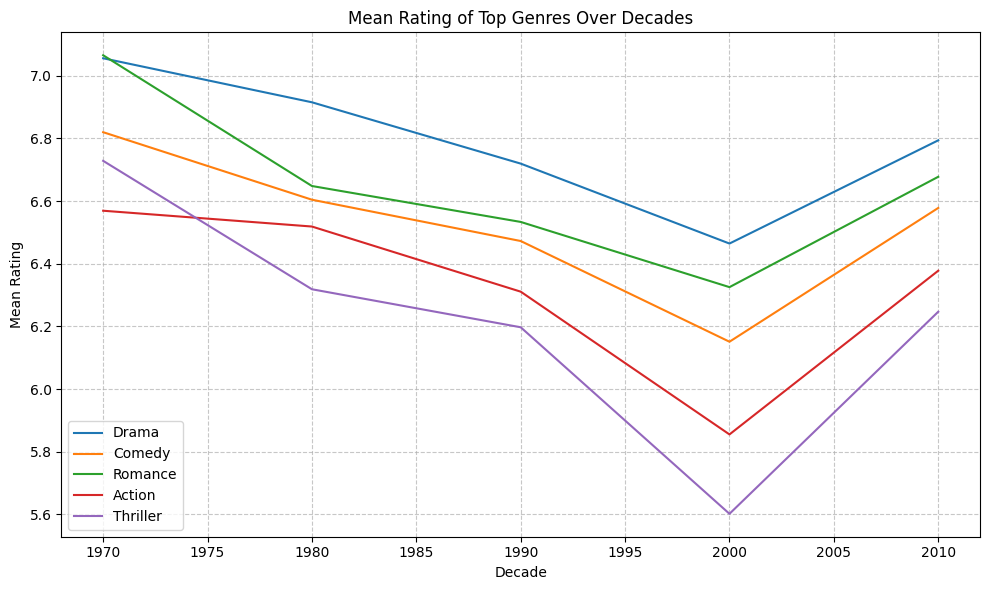

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
# Convert 'year' column to integer if it's not already
df3['year'] = df3['year'].astype('int64')

# Define the list of top genres
top_genres = ['Drama', 'Comedy', 'Romance', 'Action', 'Thriller']

# Define the decades
decades = [(1970, 1979), (1980, 1989), (1990, 1999), (2000, 2009), (2010, 2019)]

# Initialize a dictionary to store mean ratings for each genre over decades
mean_ratings_over_decades = {genre: [] for genre in top_genres}

# Calculate mean rating for each genre for each decade
for start_year, end_year in decades:
    # Filter DataFrame for the current decade
    df_decade = df3[(df3['year'] >= start_year) & (df3['year'] <= end_year)]
    
    # Iterate over each genre
    for genre in top_genres:
        # Filter DataFrame for the current genre in the current decade
        df_genre_decade = df_decade[df_decade['genre'].str.contains(genre)]
        
        # Calculate mean rating for the current genre in the current decade
        mean_rating = df_genre_decade['rating'].mean()
        
        # Append mean rating to the list for the current genre
        mean_ratings_over_decades[genre].append(mean_rating)

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot mean ratings for each genre over decades
for genre in top_genres:
    ax.plot(range(1970, 2020, 10), mean_ratings_over_decades[genre], label=genre)

# Set labels and title
ax.set_xlabel('Decade')
ax.set_ylabel('Mean Rating')
ax.set_title('Mean Rating of Top Genres Over Decades')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


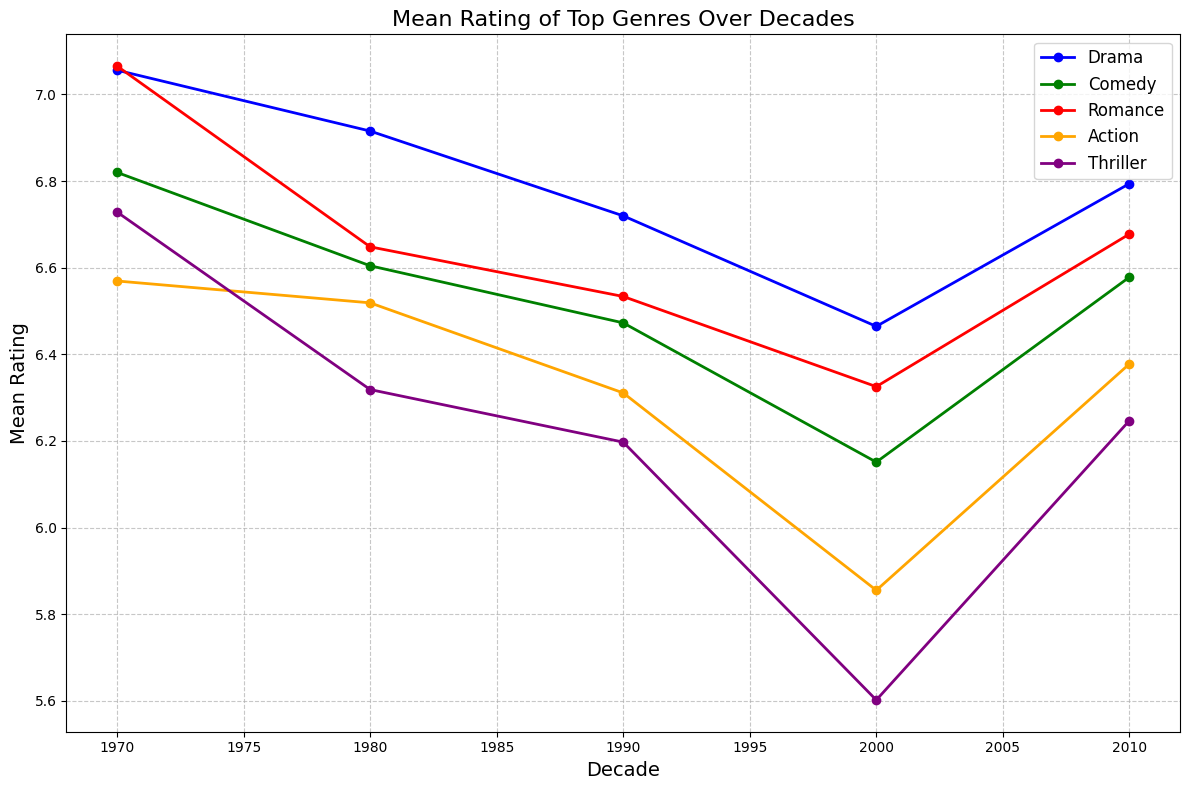

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

top_genres = ['Drama', 'Comedy', 'Romance', 'Action', 'Thriller']

# The decades
decades = [(1970, 1979), (1980, 1989), (1990, 1999), (2000, 2009), (2010, 2019)]

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 8))

# Color map
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Iterate over each genre
for i, genre in enumerate(top_genres):
    # Initialize a list to store mean ratings for each decade
    mean_ratings = []
    
    # Iterate over decades
    for decade in decades:
        start_year, end_year = decade
        
        # Filter DataFrame for the current decade and genre
        df_genre_decade = df3[(df3['year'] >= start_year) & (df3['year'] <= end_year) & (df3['genre'].str.contains(genre))]
        
        # Calculate mean rating for the current decade and genre
        mean_rating = df_genre_decade['rating'].mean()
        
        # Append mean rating to the list
        mean_ratings.append(mean_rating)
    
    # Plot line plot for the current genre
    ax.plot(range(1970, 2020, 10), mean_ratings, color=colors[i], marker='o', label=genre, linewidth=2)

# Set labels and title
ax.set_xlabel('Decade', fontsize=14)
ax.set_ylabel('Mean Rating', fontsize=14)
ax.set_title('Mean Rating of Top Genres Over Decades', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [26]:
unique_languages_count = df3['language'].nunique()

# Display the number of unique values
print("Number of unique values in the 'language' column:", unique_languages_count)


Number of unique values in the 'language' column: 760


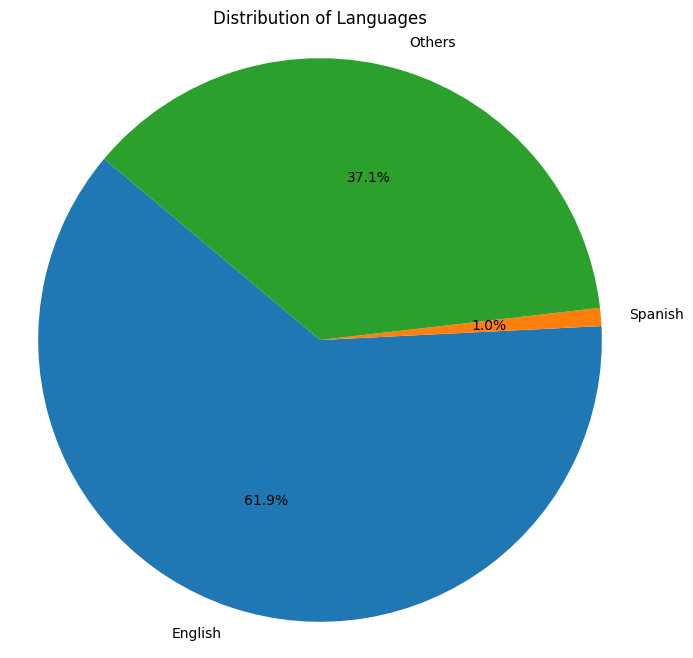

In [25]:
import matplotlib.pyplot as plt

language_counts = df3['language'].value_counts()

sorted_languages = ['English', 'Spanish']

# Extract other languages
other_languages_count = language_counts.drop(sorted_languages).sum()

# Create a new DataFrame with sorted languages
sorted_language_counts = language_counts.loc[sorted_languages]
sorted_language_counts['Others'] = other_languages_count

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(sorted_language_counts, labels=sorted_language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Languages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

